In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import codecs
import gc
import json

DATA_DIR = 'data'

CHUNKSIZE = 2000000
MAX_ROW_NUM = 50000000
# MAX_ROW_NUM = 3000000

NYC_RANGE = (-74.3400, -73.6700, 40.4500, 40.9500)
NYC_RANGE_EXTENDED = (-74.4667, -73.0083, 40.4203, 41.3077)
NYC_RANGE_FILENAME = 'gnyc.png'
nyc_map = plt.imread(os.path.join(DATA_DIR, NYC_RANGE_FILENAME))

NYC_EXTENDED_FILENAME = 'gnyce.png'
nyc_map_extended = plt.imread(os.path.join(DATA_DIR, NYC_EXTENDED_FILENAME))

WASHED_DATA_DIR = 'washed'
WASHED_FILE_NAME = 'train_wfd.csv'

INPUT_FILE_PATH = os.path.join(WASHED_DATA_DIR, WASHED_FILE_NAME)

FEATURE_NAMES = ['pickup_longitude', 'pickup_latitude', 
                'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
                 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_daytime']



In [2]:
# sum_of_x = pd.DataFrame(columns=COLUMN_NAMES)
# sum_of_xsqure = 0
# for trunk in pd.read_csv(INPUT_FILE_PATH, chunksize=CHUNKSIZE):
#     # trunk.describe()
#     break
df = pd.read_csv(INPUT_FILE_PATH)

In [3]:
cov = df.cov()

In [4]:
cov

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_daytime
fare_amount,93.172100,0.141641,-0.054858,0.103920,-0.049286,0.178415,2.087058,0.800421,0.118186,-3.969172e+03
pickup_longitude,0.141641,0.001225,-0.000034,0.000391,0.000056,0.000041,0.000772,0.000787,0.000072,1.564511e+01
pickup_latitude,-0.054858,-0.000034,0.000732,0.000053,0.000358,-0.000286,-0.000587,-0.000389,-0.000581,1.684260e+01
dropoff_longitude,0.103920,0.000391,0.000053,0.001214,0.000153,-0.000062,0.000457,0.000534,0.000178,-3.784583e+01
dropoff_latitude,-0.049286,0.000056,0.000358,0.000153,0.000961,-0.000175,-0.000389,-0.000380,-0.000491,1.378379e+01
passenger_count,0.178415,0.000041,-0.000286,-0.000062,-0.000175,1.730130,0.012511,0.024452,0.042823,5.009949e+02
pickup_year,2.087058,0.000772,-0.000587,0.000457,-0.000389,0.012511,3.469186,-0.755544,-0.149121,7.584196e+00
pickup_month,0.800421,0.000787,-0.000389,0.000534,-0.000380,0.024452,-0.755544,11.813064,-0.484518,-4.328233e+02
pickup_day,0.118186,0.000072,-0.000581,0.000178,-0.000491,0.042823,-0.149121,-0.484518,75.435980,2.411617e+02
pickup_daytime,-3969.171513,15.645112,16.842602,-37.845834,13.783785,500.994890,7.584196,-432.823290,241.161694,5.513972e+08


In [5]:
corr = df.corr()

In [6]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_daytime
fare_amount,1.000000,0.419241,-0.210088,0.309013,-0.164676,0.014052,0.116085,0.024126,0.001410,-0.017512
pickup_longitude,0.419241,1.000000,-0.035680,0.320617,0.051687,0.000898,0.011849,0.006538,0.000237,0.019035
pickup_latitude,-0.210088,-0.035680,1.000000,0.055774,0.426332,-0.008026,-0.011644,-0.004186,-0.002473,0.026514
dropoff_longitude,0.309013,0.320617,0.055774,1.000000,0.141210,-0.001343,0.007047,0.004462,0.000588,-0.046260
dropoff_latitude,-0.164676,0.051687,0.426332,0.141210,1.000000,-0.004294,-0.006731,-0.003562,-0.001822,0.018932
passenger_count,0.014052,0.000898,-0.008026,-0.001343,-0.004294,1.000000,0.005107,0.005409,0.003748,0.016220
pickup_year,0.116085,0.011849,-0.011644,0.007047,-0.006731,0.005107,1.000000,-0.118022,-0.009218,0.000173
pickup_month,0.024126,0.006538,-0.004186,0.004462,-0.003562,0.005409,-0.118022,1.000000,-0.016231,-0.005363
pickup_day,0.001410,0.000237,-0.002473,0.000588,-0.001822,0.003748,-0.009218,-0.016231,1.000000,0.001182
pickup_daytime,-0.017512,0.019035,0.026514,-0.046260,0.018932,0.016220,0.000173,-0.005363,0.001182,1.000000


In [8]:
distance = ((df.pickup_longitude-df.dropoff_longitude).pow(2) + (df.pickup_latitude-df.dropoff_latitude).pow(2)).pow(0.5)
distance.head()

0    0.009436
1    0.079696
2    0.013674
3    0.025340
4    0.019470
dtype: float64

In [9]:
df.fare_amount.corr(distance)

0.8673410576475353

In [10]:
plt.figure(figsize=(14, 14))
plt.scatter(distance, df.fare_amount, s=0.001, c='b')
plt.xlabel('distance')
plt.ylabel('fare')

Text(0,0.5,'fare')

In [22]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [12]:
plt.show()

In [11]:
df.pickup_daytime.corr(distance)

-0.02998627857236932

Text(0.5,0,'pick up daytime(h)')

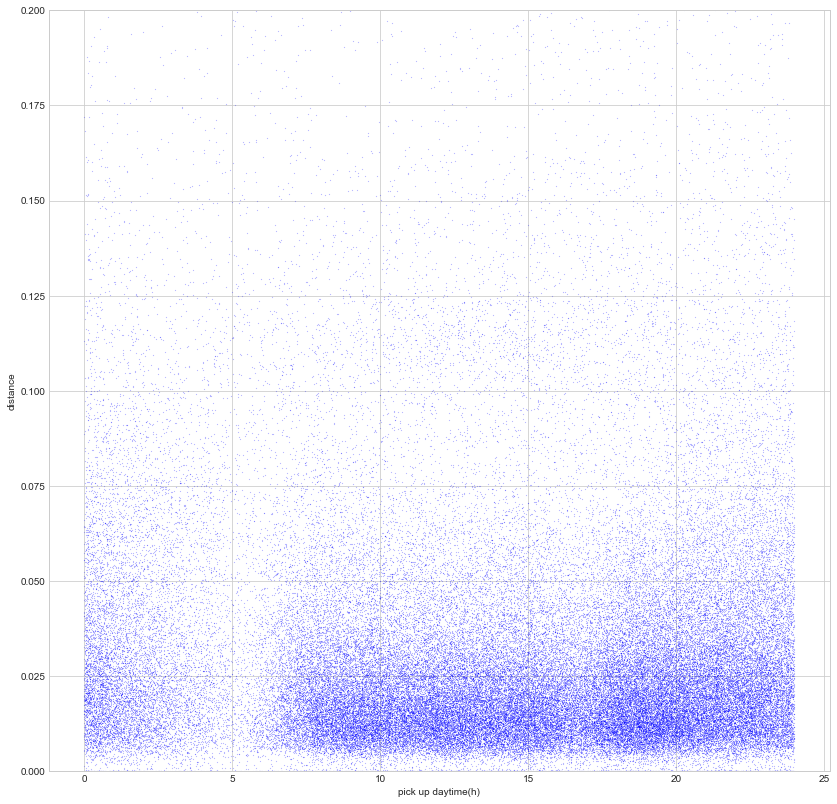

In [23]:
plt.figure(figsize=(14, 14))
plt.scatter((df.pickup_daytime/3600)[:100000], distance[:100000], s=0.01, c='b')
plt.ylim(0, 0.2)
plt.ylabel('distance')
plt.xlabel('pick up daytime(h)')

Text(0.5,1,'Relationship between Pick-up Day Time and Fare')

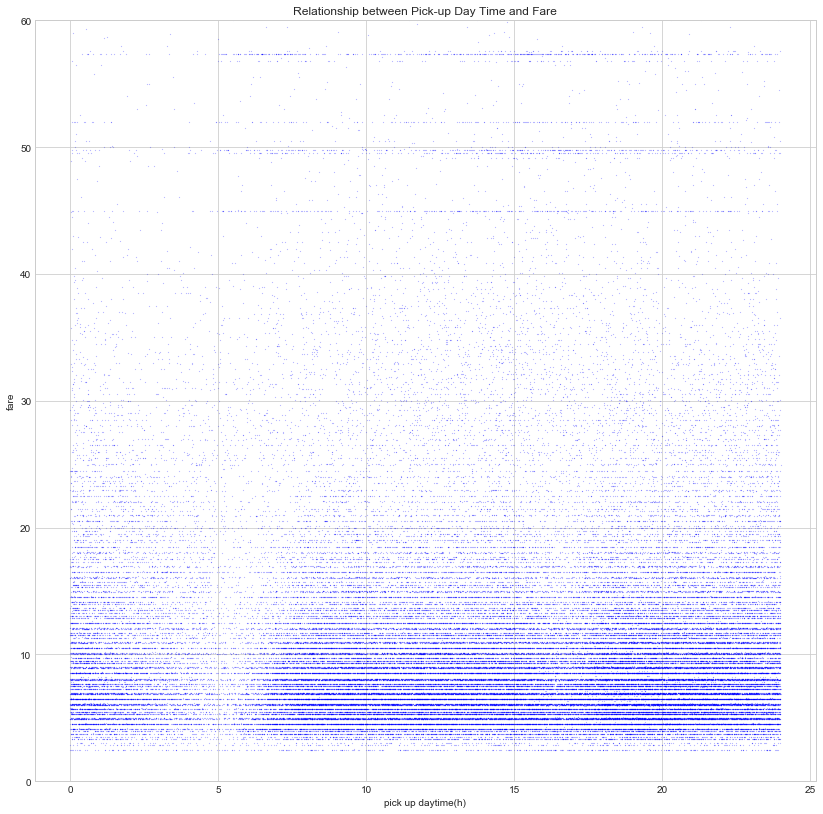

In [24]:
plt.figure(figsize=(14, 14))
plt.scatter((df.pickup_daytime/3600)[:100000], df.fare_amount[:100000], s=0.01, c='b')
plt.ylabel('fare')
plt.xlabel('pick up daytime(h)')
plt.ylim(0, 60)
plt.title('Relationship between Pick-up Day Time and Fare')

In [ ]:
plt.figure(figsize=(14, 14))
plt.scatter((df.pickup_daytime/3600)[:100000], distance[:100000], s=0.01, c='b')
plt.ylim(0, 0.2)
plt.ylabel('distance')
plt.xlabel('pick up daytime(h)')

In [25]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(zip(*df[FEATURE_NAMES], distance), df.fare_amount)

ModuleNotFoundError: No module named 'sklearn'